<a href="https://colab.research.google.com/github/pengj7/Machine_Learning_HW/blob/main/Homework_4(John_Li).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

In [ ]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import cifar10

In [ ]:
# Prepare the Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [ ]:
x_train.shape

(35000, 32, 32, 3)

Problem 1(a)

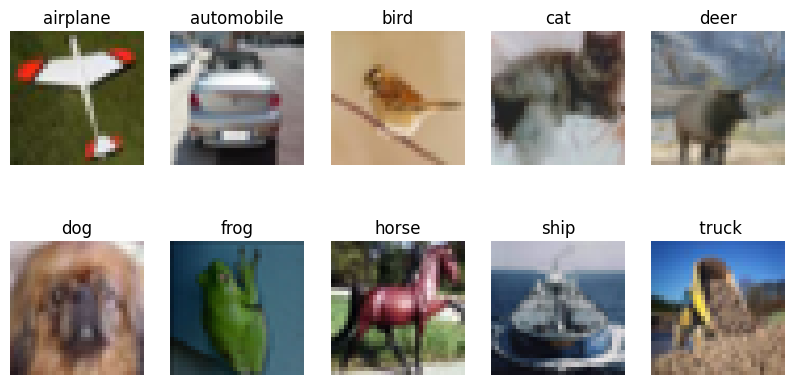

In [ ]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", " truck"]

# Plotting the images
fig, axes = plt.subplots(2,5, figsize=(10,5))
axes = axes.ravel()

for i in range(10):
  index = np.where(y_train[:, i] == 1)[0][0]
  axes[i].imshow(x_train[index])
  axes[i].set_title(class_names[i])
  axes[i].axis('off')

plt.show()

Problem 1(b)

In [4]:
# Program to create model
def create_model(learning_rate=0.001, num_units=128, activation='relu'):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),  # Flatten image to 1D
        layers.Dense(num_units, activation=activation),
        layers.Dense(num_units, activation=activation),
        layers.Dense(10, activation='softmax')  # Output layer with 10 classes
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [6]:
# Grid Search Using Nested Loops
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
def dataframe(direct):
  image_paths = []
  labels = []
  for label in os.listdir(direct):
    for imagename in os.listdir(os.path.join(direct, label)):
      image_paths.append(os.path.join(direct, label, imagename))
      labels.append(label)
    print(label, "completed")
  return image_paths, labels

In [ ]:
train = pd.DataFrame()
train['image'], train['label'] = dataframe(train_set)

In [7]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split into training (70%) and validation (30%) sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

In [8]:
def create_model(learning_rate, num_units, activation, num_layers):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))  # Flatten input image

    # Add hidden layers dynamically
    for _ in range(num_layers):
        model.add(layers.Dense(num_units, activation=activation))

    model.add(layers.Dense(10, activation='softmax'))  # Output layer

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [9]:
# Define hyperparameter grid
num_layers_list = [2, 3]
learning_rates = [0.001, 0.0001]
num_units_list = [32, 64, 128]
activations = ['relu']
batch_sizes = [32, 64, 128]


best_accuracy = 0
best_params = {}

# Grid search using nested loops
for lr in learning_rates:
    for num_units in num_units_list:
        for activation in activations:
            for num_layers in num_layers_list:
                for bat in batch_sizes:
                    print(f"Training model with lr={lr}, num_units={num_units}, activation={activation}, Hidden_Layer={num_layers}, Batch_size={bat}")

                    # Create and train model
                    model = create_model(lr, num_units, activation, num_layers)
                    history = model.fit(x_train, y_train, epochs=10, batch_size=bat, validation_data=(x_val, y_val), verbose=0)

                    # Evaluate on validation set
                    val_acc = history.history['val_accuracy'][-1]
                    print(f"Validation Accuracy: {val_acc:.4f}")

                    # Track the best model
                    if val_acc > best_accuracy:
                        best_accuracy = val_acc
                        best_params = {"learning_rate": lr, "num_units": num_units, "activation": activation, "hidden_layers": num_layers, "batch_size": bat}

print("\nBest Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Training model with lr=0.001, num_units=32, activation=relu, Hidden_Layer=2, Batch_size=32


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Validation Accuracy: 0.3165
Training model with lr=0.001, num_units=32, activation=relu, Hidden_Layer=2, Batch_size=64
Validation Accuracy: 0.3740
Training model with lr=0.001, num_units=32, activation=relu, Hidden_Layer=2, Batch_size=128
Validation Accuracy: 0.4055
Training model with lr=0.001, num_units=32, activation=relu, Hidden_Layer=3, Batch_size=32
Validation Accuracy: 0.3609
Training model with lr=0.001, num_units=32, activation=relu, Hidden_Layer=3, Batch_size=64
Validation Accuracy: 0.3617
Training model with lr=0.001, num_units=32, activation=relu, Hidden_Layer=3, Batch_size=128
Validation Accuracy: 0.4191
Training model with lr=0.001, num_units=64, activation=relu, Hidden_Layer=2, Batch_size=32
Validation Accuracy: 0.4354
Training model with lr=0.001, num_units=64, activation=relu, Hidden_Layer=2, Batch_size=64
Validation Accuracy: 0.4425
Training model with lr=0.001, num_units=64, activation=relu, Hidden_Layer=2, Batch_size=128
Validation Accuracy: 0.4368
Training model wi

In [ ]:
print("\nBest Parameters:", best_params)
print("Best Validation Accuracy:", best_accuracy)

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.2505 - loss: 2.0570 - val_accuracy: 0.3659 - val_loss: 1.7958
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3707 - loss: 1.7601 - val_accuracy: 0.3978 - val_loss: 1.6845
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4019 - loss: 1.6732 - val_accuracy: 0.4067 - val_loss: 1.6463
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4255 - loss: 1.6191 - val_accuracy: 0.4023 - val_loss: 1.6620
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4349 - loss: 1.5799 - val_accuracy: 0.4296 - val_loss: 1.5944
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4555 - loss: 1.5306 - val_accuracy: 0.4401 - val_loss: 1.5638
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4589 - loss: 1.5164 - val_accuracy: 0.4547 - val_loss: 1.5269
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4749 - loss: 1.4862 - val_accu

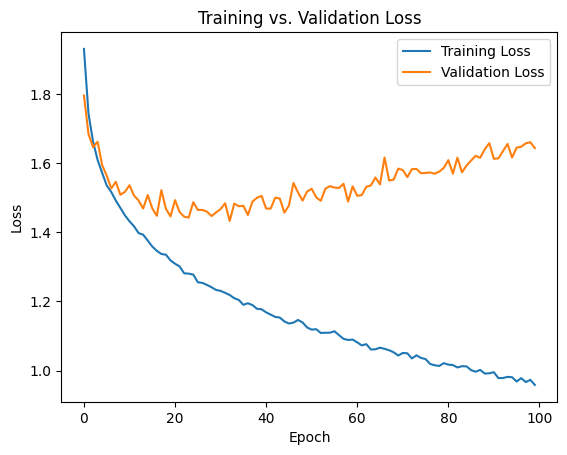

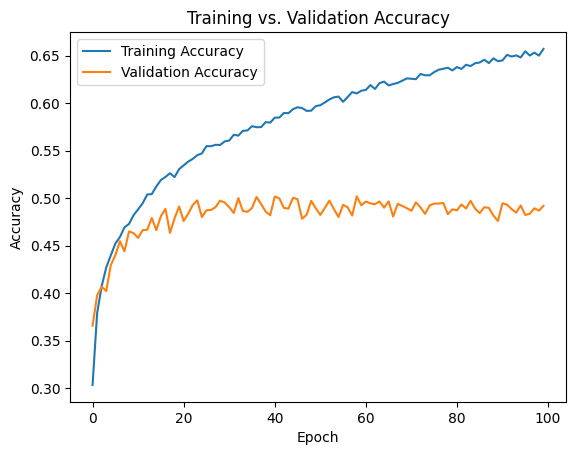

In [13]:
# Train the best model using optimal hyperparameters
best_model = create_model(best_params["learning_rate"], best_params["num_units"], best_params["activation"], best_params["hidden_layers"])
history = best_model.fit(x_train, y_train, epochs=100, batch_size=best_params["batch_size"], validation_data=(x_val, y_val))

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()

# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()


# Problem 2

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [ ]:
# Load dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
column_names = ["Frequency", "Angle of Attack", "Chord Length", "Free-Stream Velocity", "Displacement Thickness", "Sound Pressure Level"]

# Read the dataset
df = pd.read_csv(url, sep="\t", names=column_names)

# Display the first few rows
print(df.head())


   Frequency  Angle of Attack  Chord Length  Free-Stream Velocity  \
0        800              0.0        0.3048                  71.3   
1       1000              0.0        0.3048                  71.3   
2       1250              0.0        0.3048                  71.3   
3       1600              0.0        0.3048                  71.3   
4       2000              0.0        0.3048                  71.3   

   Displacement Thickness  Sound Pressure Level  
0                0.002663               126.201  
1                0.002663               125.201  
2                0.002663               125.951  
3                0.002663               127.591  
4                0.002663               127.461  


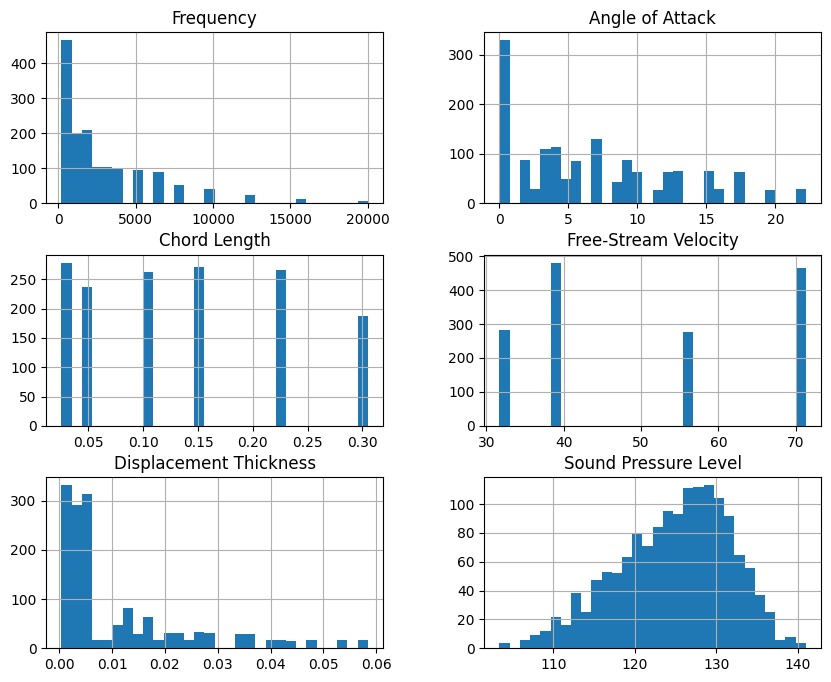

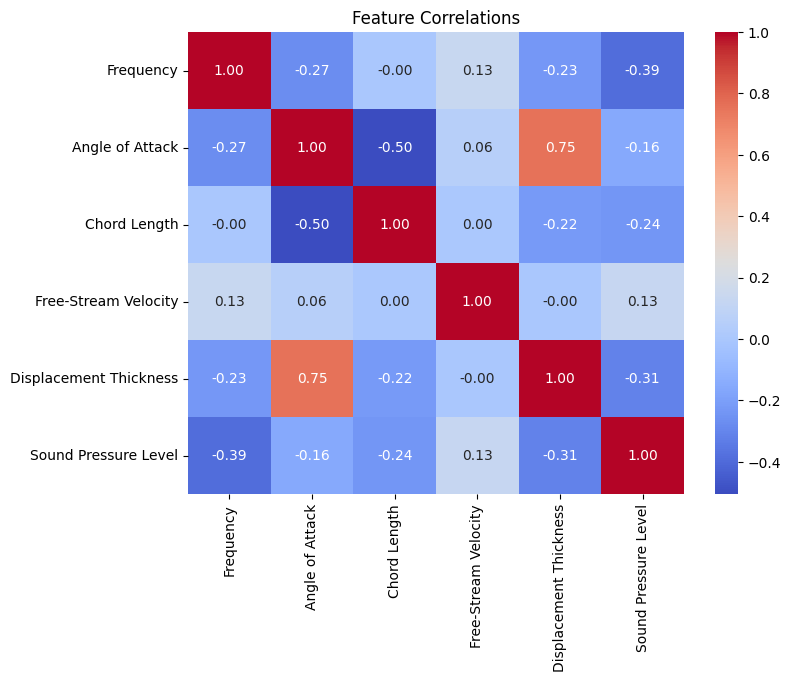

In [ ]:
df.hist(figsize=(10,8), bins=30)
plt.show()

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

In [ ]:
# Split data into input features (X) and target variable (y)
X = df.iloc[:, :-1].values  # All columns except the last
y = df.iloc[:, -1].values   # The last column (Sound Pressure Level)

# Split into training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
def create_model(learning_rate=0.001, num_units=64, activation='relu'):
    model = models.Sequential([
        layers.Dense(num_units, activation=activation, input_shape=(X_train.shape[1],)),
        layers.Dense(num_units, activation=activation),
        layers.Dense(1)  # Regression output (no activation function)
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='mse',  # Mean Squared Error for regression
                  metrics=['mae'])  # Mean Absolute Error as a secondary metric

    return model

In [ ]:
# Create the model
model = create_model()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 15469.6865 - mae: 124.1810 - val_loss: 14023.0576 - val_mae: 118.1765
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 12828.0918 - mae: 112.7987 - val_loss: 7484.1108 - val_mae: 85.6636
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5375.7583 - mae: 70.3070 - val_loss: 891.2451 - val_mae: 25.4558
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 687.1692 - mae: 21.9667 - val_loss: 388.4821 - val_mae: 16.1550
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 371.4673 - mae: 15.5802 - val_loss: 318.2634 - val_mae: 14.4223
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 305.6582 - mae: 14.1848 - val_loss: 282.2026 - val_mae: 13.5563
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 276.3827 - mae: 13.3981 - val_loss: 250.4652 - val_mae: 12.7456
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 247.1945 - mae: 12.6494 - val_loss: 222.4545 - val_mae: 12.0493
Epoc

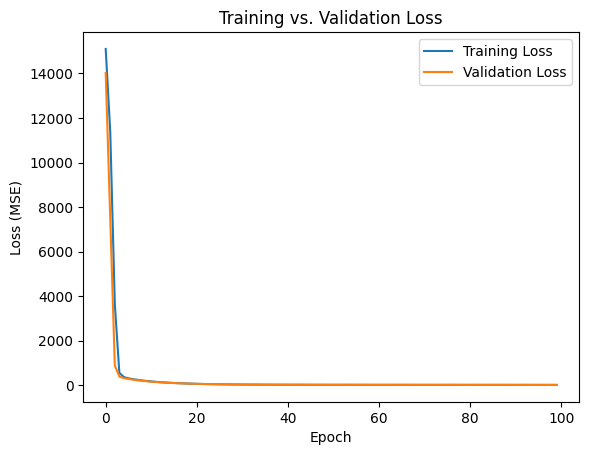

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title("Training vs. Validation Loss")
plt.show()

In [ ]:
# Make predictions
y_pred = model.predict(X_val)

# Compute R² score
r2 = r2_score(y_val, y_pred)
print(f"Coefficient of Determination (R²): {r2:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Coefficient of Determination (R²): 0.6698
